# Step - 1: Import the datasets and libraries, check shape and datatype.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# Importing data
path = r"C:\Users\hp\Desktop\Machine Learning Training"
data_train = pd.read_csv(path + r"\train.csv")

In [3]:
data_train.head()    # Prints the first 5 rows of the training dataset

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [4]:
data_train.shape     # Prints the no. of rows and columns for the training dataset

(14999, 9)

# Step - 2: Visualise the dataset using plotting using heatmaps and plots. We can study data distributions for each attribute as well.

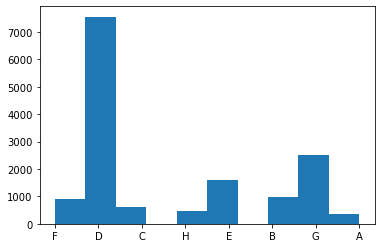

In [5]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()

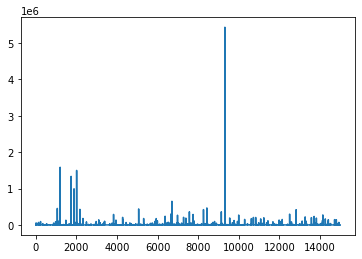

In [6]:
plt.plot(data_train["adview"])
plt.show()

In [7]:
# plt.plot(data_train["views"])
# plt.show()

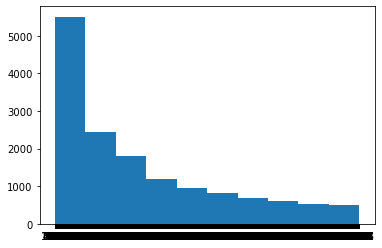

In [8]:
plt.hist(data_train["likes"])
plt.show()

In [9]:
# Remove videos with adview greater than 2000000 as outlier 
data_train = data_train[data_train["adview"] <2000000]

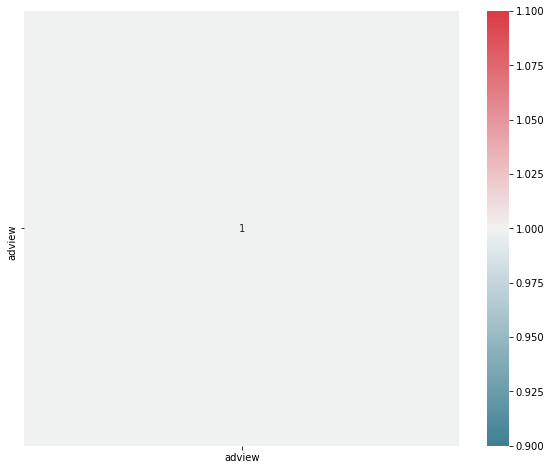

In [10]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

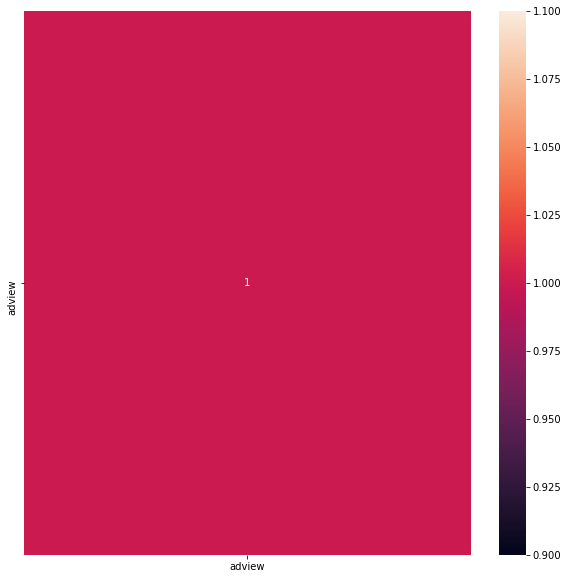

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr(),annot=True);

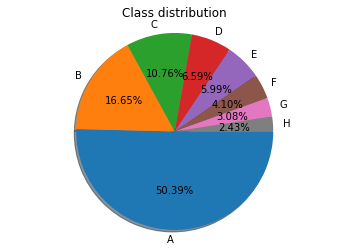

In [12]:
class_occur = data_train['category'].value_counts()
class_names = ['A','B','C','D','E','F','G','H']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  
ax.set_title('Class distribution')
plt.show()

# Step - 3: Clean the dataset by removing missing values and other things.

In [13]:
# Removing character "F" present in data
data_train = data_train[data_train.views != 'F']
data_train = data_train[data_train.likes != 'F']
data_train = data_train[data_train.dislikes != 'F']
data_train = data_train[data_train.comment != 'F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [14]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


# Step - 4: Transform attributes into numerical values and other necessary transformations.

In [15]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [16]:
column_vidid=data_train['vidid']

In [17]:
# Encoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9004,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [18]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv(r"C:\Users\hp\Desktop\Machine Learning Training\train.csv")
mp = pd.read_csv(path + r"\train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9004,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


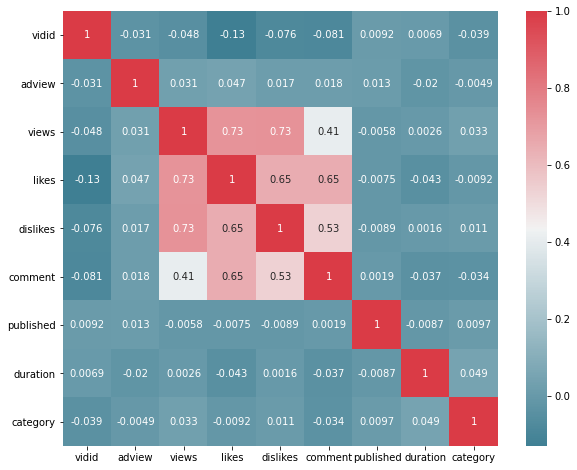

In [19]:
# Heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()
# This heatmap has been plotted after cleaning the dataset. Also, the necesary attributes have been transformed.

# Step - 5: Normalise your data and split the data into training and test set in the appropriate ratio.

In [20]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,1090,457,6
1,1707,56,2,6,64,570,4
2,2023,25,0,2,122,136,3
3,620860,777,161,153,2088,262,8
4,666,1,0,0,2233,31,4


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [22]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1212.619406,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,695.032779,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,606.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1220.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,1827.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [23]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15357571865666558

# Step - 6: Use linear regression and Support vector regressor for training and get errors.

In [24]:
# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('The Prediction:', prediction)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [25]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

The Prediction: [[1774.05090978]
 [1440.0948975 ]
 [ 946.28182324]
 ...
 [1546.81666666]
 [1252.44973363]
 [1731.84306118]]
Mean Absolute Error: 3493.3179717888047
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


In [26]:
# from sklearn.metrics import classification_report
# Y_pred1=linear_regression.predict(X_test)
# print(classification_report(y_test, Y_pred1))
# print('Accuracy score: ', round(accuracy_score(y_test, Y_pred1), 2))
# print('F1 Score: ', round(f1_score(y_test, Y_pred1), 2))

In [27]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The Prediction: [2.3899845  1.84466494 1.76599199 ... 1.8818775  1.94446014 1.79228742]
Mean Absolute Error: 1696.9815596832475
Mean Squared Error: 833685850.6202459
Root Mean Squared Error: 28873.618592414874


In [28]:
# from sklearn.metrics import classification_report
# Y_pred1=supportvector_regressor.predict(X_test)
# print(classification_report(y_test, Y_pred1))
# print('Accuracy score: ', round(accuracy_score(y_test, Y_pred1), 2))
# print('F1 Score: ', round(f1_score(y_test, Y_pred1), 2))

# Step - 7: Use Decision Tree Regressor and Random Forest Regressors.

In [29]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

The Prediction: [19.  1.  2. ...  1.  5. 10.]
Mean Absolute Error: 4603.564890710382
Mean Squared Error: 3598025249.7786884
Root Mean Squared Error: 59983.54149080136


In [30]:
# from sklearn.metrics import classification_report
# Y_pred1=decision_tree.predict(X_test)
# print(decision_tree(y_test, Y_pred1))
# print('Accuracy score: ', round(accuracy_score(y_test, Y_pred1), 2))
# print('F1 Score: ', round(f1_score(y_test, Y_pred1), 2))

In [31]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

<ipython-input-31-a96443493886>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


The Prediction: [ 19.72679377  45.22298023  18.50722433 ... 197.61933585 114.86152501
  20.48111033]
Mean Absolute Error: 3417.498989932319
Mean Squared Error: 884955984.4888579
Root Mean Squared Error: 29748.209769477857


In [32]:
# from sklearn.metrics import classification_report
# Y_pred1=random_forest.predict(X_test)
# print(random_forest(y_test, Y_pred1))
# print('Accuracy score: ', round(accuracy_score(y_test, Y_pred1), 2))
# print('F1 Score: ', round(f1_score(y_test, Y_pred1), 2))

# Step - 8: Build an artificial neural network and train it with different layers and hyperparameters. Experiment a little. Use keras.

In [33]:
# Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                             ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [34]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()

Epoch 1/100
366/366 [==============================] - 0s 1ms/step - loss: 767407104.0000 - mean_squared_error: 767407104.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 767400448.0000 - mean_squared_error: 767400448.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767389376.0000 - mean_squared_error: 767389376.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 767369344.0000 - mean_squared_error: 767369344.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767341504.0000 - mean_squared_error: 767341504.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767308544.0000 - mean_squared_error: 767308544.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767264128.0000 - mean_squared_error: 767264128.0000
Epoch 8/100
366/366 [==============================] - 1s 1ms/step - loss: 767211136.0000 - mean_squared_error:

In [35]:
print_error(X_test,y_test,ann)

The Prediction: [[1549.2354]
 [1759.3286]
 [1155.5033]
 ...
 [1863.8887]
 [1418.4167]
 [1979.3699]]
Mean Absolute Error: 3156.2298773624857
Mean Squared Error: 830626348.2227757
Root Mean Squared Error: 28820.58896384277


In [36]:
# from sklearn.metrics import classification_report
# Y_pred1=ann.predict(X_test)
# print(ann(y_test, Y_pred1))
# print('Accuracy score: ', round(accuracy_score(y_test, Y_pred1), 2))
# print('F1 Score: ', round(f1_score(y_test, Y_pred1), 2))

# Step - 9: Pick the best model based on error as well as generalisation.

In [37]:
# Artificial Neural Network has emerged out to be the most efficient algorithm because it has the least values of mean square error and root mean square error (since it is the square root of mean square error).

# Step - 10: Save your model and predict on the test set.

In [38]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [39]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [40]:
# Importing data
path = r"C:\Users\hp\Desktop\Machine Learning Training"
data_test = pd.read_csv(path + r"\test.csv")

In [41]:
data_test.head()    # Prints the first 5 rows of the testing dataset

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [42]:
data_test.shape     # Prints the no. of rows and columns for the testing dataset

(8764, 8)

In [43]:
data_test.describe

<bound method NDFrame.describe of           vidid    views likes dislikes comment   published    duration  \
0      VID_1054   440238  6153      218    1377  18-02-2017     PT7M29S   
1     VID_18629  1040132  8171      340    1047  28-06-2016     PT6M29S   
2     VID_13967    28534    31       11       1  10-03-2014    PT37M54S   
3     VID_19442  1316715  2284      250     274  05-06-2010     PT9M55S   
4       VID_770  1893173  2519      225     116  03-09-2016      PT3M8S   
...         ...      ...   ...      ...     ...         ...         ...   
8759   VID_2944   111205   471       14     101  19-04-2011     PT3M14S   
8760   VID_8195  1074457  1024      195      65  03-06-2016  PT2H18M35S   
8761  VID_18973  1891692  4606     1109     191  26-06-2016     PT7M14S   
8762   VID_5849   714859  1639      151     382  23-03-2016     PT3M15S   
8763   VID_8494     5297    12        1       0  19-12-2016    PT10M14S   

     category  
0           B  
1           F  
2           D  
3

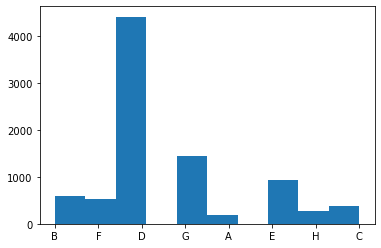

In [44]:
# Visualization
# Individual Plots
plt.hist(data_test["category"])
plt.show()

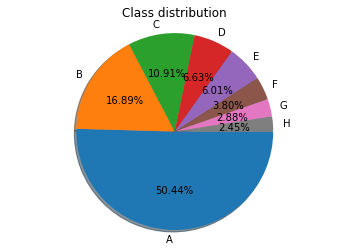

In [45]:
class_occur = data_train['category'].value_counts()
class_names = ['A','B','C','D','E','F','G','H']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  
ax.set_title('Class distribution')
plt.show()

In [46]:
# plt.plot(data_test["views"])
# plt.show()

In [47]:
# plt.hist(data_train["likes"])
# plt.show()

In [48]:
# Removing character "F" present in data
data_test = data_test[data_test.views != 'F']
data_test = data_test[data_test.likes != 'F']
data_test = data_test[data_test.dislikes != 'F']
data_test = data_test[data_test.comment != 'F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [49]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"] = data_test["category"].map(category)
data_test.head()     # This will be our dataset after cleaning and categorizing the features.

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [50]:
# Convert values to integers for views, likes, comments and dislikes
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
# data_test["adview"]=pd.to_numeric(data_test["adview"])

In [51]:
column_vidid=data_test['vidid']

In [52]:
# Encoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,2115,2
1,3444,1040132,8171,340,1047,1898,2055,6
2,1593,28534,31,11,1,634,1506,4
3,3775,1316715,2284,250,274,307,2265,7
4,7644,1893173,2519,225,116,187,1625,2


In [53]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
test=pd.read_csv(r"C:\Users\hp\Desktop\Machine Learning Training\test.csv")
mp = pd.read_csv(path + r"\test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,449,2
1,3444,1040132,8171,340,1047,1898,389,6
2,1593,28534,31,11,1,634,2274,4
3,3775,1316715,2284,250,274,307,595,7
4,7644,1893173,2519,225,116,187,188,2


In [54]:
# # Split Data
# Y_train = pd.DataFrame(data = data_test.iloc[:, 1].values, columns = ['target'])
# # data_test=data_test.drop(["adview"],axis=1)
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,1186,449,2
1,1040132,8171,340,1047,1898,389,6
2,28534,31,11,1,634,2274,4
3,1316715,2284,250,274,307,595,7
4,1893173,2519,225,116,187,188,2


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [56]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1212.619406,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,695.032779,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,606.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1220.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,1827.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [57]:
X_test

,views,likes,dislikes,comment,published,duration,category
4912,630898,1625,117,80,985,365,4
4921,384,2,0,0,1229,15,5
3813,36772,138,4,7,662,904,2
9091,73482,74,21,4,186,1308,4
8485,86827,257,5,128,2216,481,4
...,...,...,...,...,...,...,...
3788,40389,250,7,9,1347,189,4
4993,127443,61,10,0,1512,143,4
6953,85311,25,12,1,1770,408,5
769,67541,691,19,66,529,363,4


In [58]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test=scaler.fit_transform(X_test)
X_test.mean()

0.15686635919120331

In [59]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('The Prediction:', prediction)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [60]:
# Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                             ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [61]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()

Epoch 1/100
366/366 [==============================] - 0s 1ms/step - loss: 767408000.0000 - mean_squared_error: 767408000.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 767407616.0000 - mean_squared_error: 767407616.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767407104.0000 - mean_squared_error: 767407104.0000
Epoch 4/100
366/366 [==============================] - 0s 980us/step - loss: 767406656.0000 - mean_squared_error: 767406656.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767405376.0000 - mean_squared_error: 767405376.0000
Epoch 6/100
366/366 [==============================] - 0s 997us/step - loss: 767554880.0000 - mean_squared_error: 767554880.0000
Epoch 7/100
366/366 [==============================] - 0s 983us/step - loss: 767394880.0000 - mean_squared_error: 767394880.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767389632.0000 - mean_squared_

In [62]:
print_error(X_test,y_test,ann)

The Prediction: [[15.037822]
 [15.204585]
 [14.741357]
 ...
 [15.317921]
 [14.940595]
 [15.431635]]
Mean Absolute Error: 1704.2475258545146
Mean Squared Error: 833642741.1018701
Root Mean Squared Error: 28872.872061883107


In [63]:
# prediction = ann.predict(X_test)
# prediction

In [64]:
# with np.printoptions(threshold=np.inf):
#     print(prediction)

In [65]:
y_pred = ann.predict(X_test)
y_pred

array([[15.037822],
       [15.204585],
       [14.741357],
       ...,
       [15.317921],
       [14.940595],
       [15.431635]], dtype=float32)

In [66]:
import pandas as pd
import numpy as np
y_pred = pd.DataFrame(y_pred)
y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2928 non-null   float32
dtypes: float32(1)
memory usage: 11.6 KB


In [67]:
y_pred = y_pred.rename(columns = {0:"Adview"})

In [68]:
y_pred.head()

,Adview
0,15.037822
1,15.204585
2,14.741357
3,14.862818
4,15.303059


In [69]:
# y_pred = pd.DataFrame(y_pred, columns = ['y_pred']).to_csv('predictions.csv')

In [70]:
y_pred.to_csv(r'C:\Users\hp\Desktop\Machine Learning Training\predictionsfortest.csv')